In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
taxi_df = pd.read_csv('cleaned_taxi_data.csv')

In [38]:
print(taxi_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6133289 entries, 0 to 6133288
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   tpep_pickup_datetime   object 
 1   tpep_dropoff_datetime  object 
 2   trip_distance          float64
 3   passenger_count        float64
 4   PULocationID           int64  
 5   DOLocationID           int64  
 6   fare_amount            float64
 7   trip_duration          float64
dtypes: float64(4), int64(2), object(2)
memory usage: 374.3+ MB
None


In [39]:
taxi_df['tpep_pickup_datetime'] = pd.to_datetime(taxi_df['tpep_pickup_datetime'])
taxi_df['tpep_dropoff_datetime'] = pd.to_datetime(taxi_df['tpep_dropoff_datetime'])

In [40]:
taxi_df = taxi_df[taxi_df['tpep_pickup_datetime'] >= '2023-01-01']

In [41]:
taxi_df.set_index('tpep_pickup_datetime', inplace=True)

In [42]:
print("Min Date:", taxi_df.index.min())
print("Max Date:", taxi_df.index.max())

Min Date: 2023-11-30 22:54:23
Max Date: 2024-02-01 00:01:15


In [43]:
taxi_df['year'] = taxi_df.index.year
taxi_df['month'] = taxi_df.index.month
taxi_df['day'] = taxi_df.index.day
taxi_df['hour'] = taxi_df.index.hour
taxi_df['day_name'] = taxi_df.index.day_name()

In [44]:
taxi_2023 = taxi_df[taxi_df.index.year == 2023]
print(taxi_2023)

                     tpep_dropoff_datetime  trip_distance  passenger_count  \
tpep_pickup_datetime                                                         
2023-12-01 00:06:06    2023-12-01 00:15:47           1.10              0.0   
2023-12-01 00:22:26    2023-12-01 00:28:53           1.50              0.0   
2023-12-01 00:59:44    2023-12-01 01:13:22           2.20              2.0   
2023-12-01 00:22:17    2023-12-01 00:30:59           0.66              1.0   
2023-12-01 00:18:16    2023-12-01 00:25:32           2.20              2.0   
...                                    ...            ...              ...   
2023-12-31 23:49:12    2024-01-01 00:04:32           3.14              1.0   
2023-12-31 23:47:28    2023-12-31 23:57:07           1.44              2.0   
2023-12-31 23:58:35    2024-01-01 00:13:06           8.39              6.0   
2023-12-31 23:58:37    2024-01-01 00:08:37           0.59              2.0   
2023-12-31 23:54:27    2024-01-01 00:13:12           7.70       

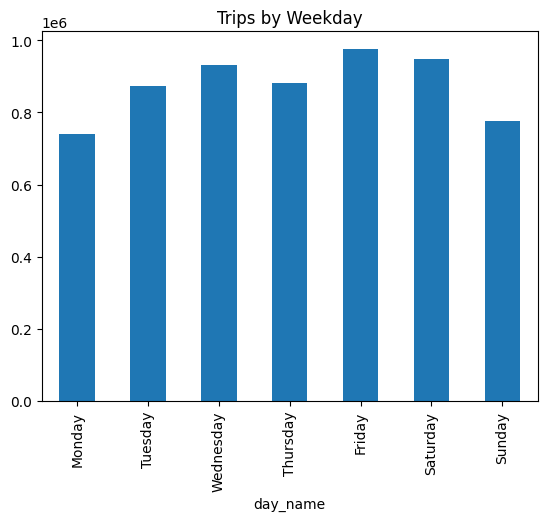

In [45]:
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts = taxi_df['day_name'].value_counts().reindex(weekday_order)
weekday_counts.plot(kind='bar', title='Trips by Weekday')
plt.show()

In [100]:
daily_trips = taxi_df.resample('D').size()
print(daily_trips.head())

tpep_pickup_datetime
2023-11-30 00:00:00-05:00      8396
2023-12-01 00:00:00-05:00    134796
2023-12-02 00:00:00-05:00    121455
2023-12-03 00:00:00-05:00     86362
2023-12-04 00:00:00-05:00     99934
Freq: D, dtype: int64


In [47]:
daily_revenue = taxi_df['fare_amount'].resample('D').sum()
print(daily_revenue.tail())

tpep_pickup_datetime
2024-01-28    1639072.72
2024-01-29    1551065.39
2024-01-30    1739120.87
2024-01-31    1774334.91
2024-02-01         58.00
Freq: D, Name: fare_amount, dtype: float64


In [48]:
weekly_stats = taxi_df.resample('W').agg({
    'fare_amount': ['sum', 'mean', 'count'],
    'trip_distance': ['mean', 'median', 'max'],
    'passenger_count': 'sum'
})

print(weekly_stats.tail())

                      fare_amount                    trip_distance         \
                              sum       mean   count          mean median   
tpep_pickup_datetime                                                        
2024-01-07            11489487.85  19.548090  587755      3.832770   1.82   
2024-01-14            11992513.81  18.285062  655864      3.746552   1.70   
2024-01-21            12039310.99  18.313719  657393      3.717722   1.67   
2024-01-28            12497995.14  18.152129  688514      3.411491   1.70   
2024-02-04             5064579.17  18.083456  280067      4.318154   1.66   

                                passenger_count  
                            max             sum  
tpep_pickup_datetime                             
2024-01-07             59282.45        823841.0  
2024-01-14             59076.43        870153.0  
2024-01-21             82015.45        865251.0  
2024-01-28             97793.92        896008.0  
2024-02-04            312722.30  

In [50]:
monthly_stats = taxi_df.resample('ME').agg({
    'fare_amount': ['sum', 'mean', 'count'],
    'trip_distance': ['mean', 'median']
})
print(monthly_stats)

                      fare_amount                     trip_distance       
                              sum       mean    count          mean median
tpep_pickup_datetime                                                      
2023-11-30                 549.80  16.660606       33      2.968788   2.06
2023-12-31            65320418.31  20.014492  3263656      3.764539   1.74
2024-01-31            53083828.96  18.498750  2869590      3.733001   1.70
2024-02-29                  58.00  19.333333        3      4.083333   2.22


In [52]:
yearly_stats = taxi_df.resample('YE').agg({
    'fare_amount': ['sum', 'min', 'max', 'mean', 'count', 'std', 'first', 'last'],
    'trip_distance': ['mean', 'median', 'max', 'min', 'std']
})
print(yearly_stats)

                      fare_amount                                     \
                              sum   min      max       mean    count   
tpep_pickup_datetime                                                   
2023-12-31            65320968.11  0.01  2320.11  20.014459  3263689   
2024-12-31            53083886.96  0.01  2221.30  18.498751  2869593   

                                            trip_distance                   \
                            std first  last          mean median       max   
tpep_pickup_datetime                                                         
2023-12-31            17.821061  13.5  22.6      3.764531   1.74  161726.1   
2024-12-31            17.265482   4.4   7.9      3.733001   1.70  312722.3   

                                        
                       min         std  
tpep_pickup_datetime                    
2023-12-31            0.01  156.798380  
2024-12-31            0.01  229.164092  


In [53]:
print("Current timezone info:", taxi_df.index.tz)

Current timezone info: None


In [54]:
taxi_df.index = taxi_df.index.tz_localize('UTC')

In [55]:
print(taxi_df.head())

                          tpep_dropoff_datetime  trip_distance  \
tpep_pickup_datetime                                             
2023-12-01 00:06:06+00:00   2023-12-01 00:15:47           1.10   
2023-12-01 00:22:26+00:00   2023-12-01 00:28:53           1.50   
2023-12-01 00:59:44+00:00   2023-12-01 01:13:22           2.20   
2023-12-01 00:22:17+00:00   2023-12-01 00:30:59           0.66   
2023-12-01 00:18:16+00:00   2023-12-01 00:25:32           2.20   

                           passenger_count  PULocationID  DOLocationID  \
tpep_pickup_datetime                                                     
2023-12-01 00:06:06+00:00              0.0           230            48   
2023-12-01 00:22:26+00:00              0.0           142           238   
2023-12-01 00:59:44+00:00              2.0           114           186   
2023-12-01 00:22:17+00:00              1.0            79            79   
2023-12-01 00:18:16+00:00              2.0           229           263   

                  

In [56]:
taxi_df.index = taxi_df.index.tz_convert('America/New_York')

In [57]:
print(taxi_df.head())

                          tpep_dropoff_datetime  trip_distance  \
tpep_pickup_datetime                                             
2023-11-30 19:06:06-05:00   2023-12-01 00:15:47           1.10   
2023-11-30 19:22:26-05:00   2023-12-01 00:28:53           1.50   
2023-11-30 19:59:44-05:00   2023-12-01 01:13:22           2.20   
2023-11-30 19:22:17-05:00   2023-12-01 00:30:59           0.66   
2023-11-30 19:18:16-05:00   2023-12-01 00:25:32           2.20   

                           passenger_count  PULocationID  DOLocationID  \
tpep_pickup_datetime                                                     
2023-11-30 19:06:06-05:00              0.0           230            48   
2023-11-30 19:22:26-05:00              0.0           142           238   
2023-11-30 19:59:44-05:00              2.0           114           186   
2023-11-30 19:22:17-05:00              1.0            79            79   
2023-11-30 19:18:16-05:00              2.0           229           263   

                  

In [77]:
taxi_df['rolling_7day'] = daily_trips.rolling(7).mean()

In [82]:
print(taxi_df.head(200))

                          tpep_dropoff_datetime  trip_distance  \
tpep_pickup_datetime                                             
2023-11-30 19:06:06-05:00   2023-12-01 00:15:47           1.10   
2023-11-30 19:22:26-05:00   2023-12-01 00:28:53           1.50   
2023-11-30 19:59:44-05:00   2023-12-01 01:13:22           2.20   
2023-11-30 19:22:17-05:00   2023-12-01 00:30:59           0.66   
2023-11-30 19:18:16-05:00   2023-12-01 00:25:32           2.20   
...                                         ...            ...   
2023-11-30 19:08:05-05:00   2023-12-01 00:18:30           2.22   
2023-11-30 19:27:15-05:00   2023-12-01 00:34:25           1.04   
2023-11-30 19:38:11-05:00   2023-12-01 00:56:33           3.59   
2023-11-30 19:41:08-05:00   2023-12-01 01:04:46           4.60   
2023-11-30 19:27:05-05:00   2023-12-01 00:38:03           2.66   

                           passenger_count  PULocationID  DOLocationID  \
tpep_pickup_datetime                                               

In [93]:
taxi_df.drop(['rolling_24hr','rolling_7day'], axis=1)

,tpep_dropoff_datetime,trip_distance,passenger_count,PULocationID,DOLocationID,fare_amount,trip_duration,year,month,day,hour,day_name
tpep_pickup_datetime,,,,,,,,,,,,
2023-11-30 19:06:06-05:00,2023-12-01 00:15:47,1.10,0.0,230,48,10.00,9.683333,2023,12,1,0,Friday
2023-11-30 19:22:26-05:00,2023-12-01 00:28:53,1.50,0.0,142,238,9.30,6.450000,2023,12,1,0,Friday
2023-11-30 19:59:44-05:00,2023-12-01 01:13:22,2.20,2.0,114,186,13.50,13.633333,2023,12,1,0,Friday
2023-11-30 19:22:17-05:00,2023-12-01 00:30:59,0.66,1.0,79,79,7.20,8.700000,2023,12,1,0,Friday
2023-11-30 19:18:16-05:00,2023-12-01 00:25:32,2.20,2.0,229,263,11.40,7.266667,2023,12,1,0,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-31 18:45:59-05:00,2024-01-31 23:54:36,3.18,1.0,107,263,15.77,8.616667,2024,1,31,23,Wednesday
2024-01-31 18:13:07-05:00,2024-01-31 23:27:52,4.00,1.0,114,236,18.40,14.750000,2024,1,31,23,Wednesday
2024-01-31 18:19:00-05:00,2024-01-31 23:38:00,3.33,1.0,211,25,19.97,19.000000,2024,1,31,23,Wednesday


In [95]:
daily_trips = daily_trips.reindex(taxi_df.index, fill_value=0)

In [101]:
rolling_avg = daily_trips.rolling(7).mean()

In [102]:
print(rolling_avg.head(20))

tpep_pickup_datetime
2023-11-30 00:00:00-05:00              NaN
2023-12-01 00:00:00-05:00              NaN
2023-12-02 00:00:00-05:00              NaN
2023-12-03 00:00:00-05:00              NaN
2023-12-04 00:00:00-05:00              NaN
2023-12-05 00:00:00-05:00              NaN
2023-12-06 00:00:00-05:00     99947.857143
2023-12-07 00:00:00-05:00    118220.285714
2023-12-08 00:00:00-05:00    118491.142857
2023-12-09 00:00:00-05:00    120024.857143
2023-12-10 00:00:00-05:00    120457.142857
2023-12-11 00:00:00-05:00    121573.857143
2023-12-12 00:00:00-05:00    122144.571429
2023-12-13 00:00:00-05:00    122976.857143
2023-12-14 00:00:00-05:00    124230.571429
2023-12-15 00:00:00-05:00    125404.571429
2023-12-16 00:00:00-05:00    125341.000000
2023-12-17 00:00:00-05:00    124704.714286
2023-12-18 00:00:00-05:00    123330.142857
2023-12-19 00:00:00-05:00    122682.714286
Freq: D, dtype: float64


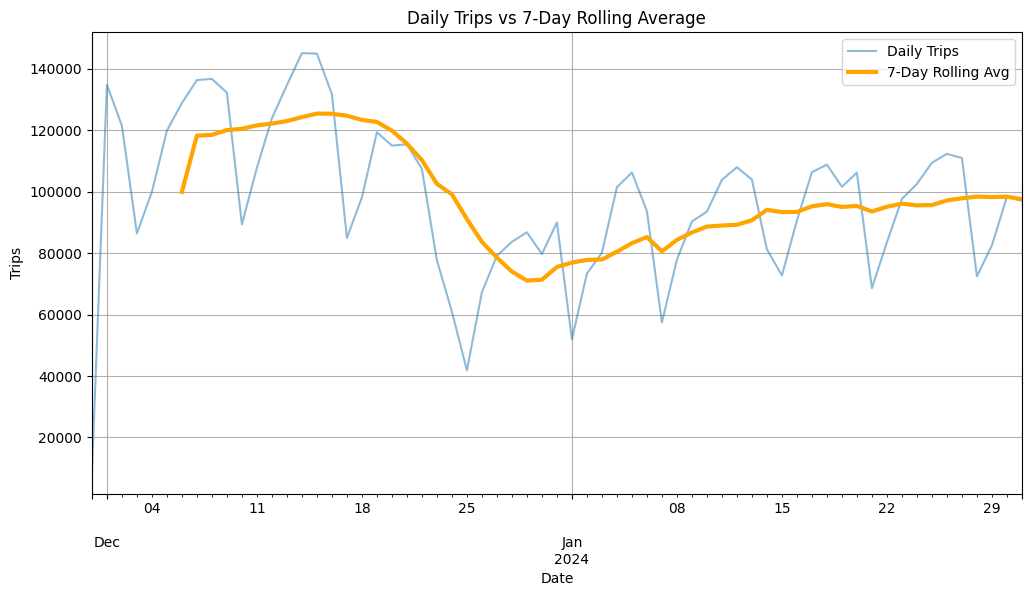

In [103]:
plt.figure(figsize=(12, 6))
daily_trips.plot(alpha=0.5, label='Daily Trips')
rolling_avg.plot(color='orange', linewidth=3, label='7-Day Rolling Avg')
plt.title("Daily Trips vs 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Trips")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
prev_day_trips = daily_trips.shift(3)
print(prev_day_trips.head(200))

tpep_pickup_datetime
2023-11-30 00:00:00-05:00         NaN
2023-12-01 00:00:00-05:00         NaN
2023-12-02 00:00:00-05:00         NaN
2023-12-03 00:00:00-05:00      8396.0
2023-12-04 00:00:00-05:00    134796.0
                               ...   
2024-01-27 00:00:00-05:00    102504.0
2024-01-28 00:00:00-05:00    109393.0
2024-01-29 00:00:00-05:00    112300.0
2024-01-30 00:00:00-05:00    110934.0
2024-01-31 00:00:00-05:00     72454.0
Freq: D, Length: 63, dtype: float64


In [115]:
prev_day_trips = daily_trips.shift(3, fill_value='empty')
print(prev_day_trips.head(200))

tpep_pickup_datetime
2023-11-30 00:00:00-05:00     empty
2023-12-01 00:00:00-05:00     empty
2023-12-02 00:00:00-05:00     empty
2023-12-03 00:00:00-05:00      8396
2023-12-04 00:00:00-05:00    134796
                              ...  
2024-01-27 00:00:00-05:00    102504
2024-01-28 00:00:00-05:00    109393
2024-01-29 00:00:00-05:00    112300
2024-01-30 00:00:00-05:00    110934
2024-01-31 00:00:00-05:00     72454
Freq: D, Length: 63, dtype: object


In [116]:
prev_day_trips = daily_trips.shift(3, freq='D')
print(prev_day_trips.head(200))

tpep_pickup_datetime
2023-12-03 00:00:00-05:00      8396
2023-12-04 00:00:00-05:00    134796
2023-12-05 00:00:00-05:00    121455
2023-12-06 00:00:00-05:00     86362
2023-12-07 00:00:00-05:00     99934
                              ...  
2024-01-30 00:00:00-05:00    110934
2024-01-31 00:00:00-05:00     72454
2024-02-01 00:00:00-05:00     82501
2024-02-02 00:00:00-05:00     98344
2024-02-03 00:00:00-05:00     96990
Freq: D, Length: 63, dtype: int64


In [ ]:
taxi_df = taxi_df.sort_index()

taxi_df['time_diff'] = taxi_df.index.to_series().diff()
taxi_df['time_diff_minutes'] = taxi_df['time_diff'].dt.total_seconds() / 60

print(taxi_df[['time_diff', 'time_diff_minutes']].head(10))

                                time_diff  time_diff_minutes
tpep_pickup_datetime                                        
2023-11-30 17:54:23-05:00             NaT                NaN
2023-11-30 18:24:47-05:00 0 days 00:30:24          30.400000
2023-11-30 18:38:43-05:00 0 days 00:13:56          13.933333
2023-11-30 18:52:15-05:00 0 days 00:13:32          13.533333
2023-11-30 18:52:53-05:00 0 days 00:00:38           0.633333
2023-11-30 18:53:13-05:00 0 days 00:00:20           0.333333
2023-11-30 18:53:20-05:00 0 days 00:00:07           0.116667
2023-11-30 18:54:29-05:00 0 days 00:01:09           1.150000
2023-11-30 18:54:32-05:00 0 days 00:00:03           0.050000
2023-11-30 18:54:57-05:00 0 days 00:00:25           0.416667


In [ ]:
# Average time between trips
avg_time_between = taxi_df['time_diff_minutes'].mean()
print(f"Average time between trips: {avg_time_between:.2f} minutes")

# Busiest periods (shortest time between trips)
busy_periods = taxi_df[taxi_df['time_diff_minutes'] < 5]
print(f"High-frequency periods: {len(busy_periods)} trips")

Average time between trips: 0.01 minutes
High-frequency periods: 6133278 trips


This is irrelavant here as the data is not for a single taxi. But time diff can be used like this!

#### Most Frequent Pickup Hours per Day

In [125]:
# Reset index to get datetime back as column
taxi_df_reset = taxi_df.reset_index()

# Get pickup hour
taxi_df_reset['hour'] = taxi_df_reset['tpep_pickup_datetime'].dt.hour
taxi_df_reset['date'] = taxi_df_reset['tpep_pickup_datetime'].dt.date

# Group by date and aggregate all hours into a list
hour_lists = taxi_df_reset.groupby('date')['hour'].apply(list).reset_index()

# Explode the list to get one hour per row
exploded = hour_lists.explode('hour')

# Count frequency
hourly_counts = exploded.groupby(['date', 'hour']).size().reset_index(name='trip_count')
print(hourly_counts.head(10))


         date  hour  trip_count
0  2023-11-30    17           1
1  2023-11-30    18          32
2  2023-11-30    19        3933
3  2023-11-30    20        1935
4  2023-11-30    21        1292
5  2023-11-30    22         689
6  2023-11-30    23         514
7  2023-12-01     0         664
8  2023-12-01     1        1500
9  2023-12-01     2        3414


In [124]:
hour_lists

,date,hour
0,2023-11-30,"[17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1..."
1,2023-12-01,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2023-12-02,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,2023-12-03,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,2023-12-04,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...
58,2024-01-27,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
59,2024-01-28,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
60,2024-01-29,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
61,2024-01-30,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


#### Time Periods

In [126]:
# Categorize each trip into multiple time periods it spans
def get_time_categories(hour):
    categories = []
    if 6 <= hour <= 9: categories.append('morning_rush')
    if 17 <= hour <= 19: categories.append('evening_rush')
    if 22 <= hour or hour <= 5: categories.append('late_night')
    if 9 <= hour <= 17: categories.append('business_hours')
    return categories if categories else ['off_peak']

taxi_df_reset['time_categories'] = taxi_df_reset['hour'].apply(get_time_categories)

# Explode to analyze overlapping time periods
time_exploded = taxi_df_reset[['date', 'time_categories', 'trip_distance']].explode('time_categories')
avg_distance_by_period = time_exploded.groupby('time_categories')['trip_distance'].mean()

In [127]:
# Show the first 10 rows after exploding
print(time_exploded.head(10))

# Count trips per category
print(time_exploded['time_categories'].value_counts())

         date time_categories  trip_distance
0  2023-11-30    evening_rush           2.09
0  2023-11-30  business_hours           2.09
1  2023-11-30    evening_rush           1.39
2  2023-11-30    evening_rush           1.52
3  2023-11-30    evening_rush           1.14
4  2023-11-30    evening_rush           6.70
5  2023-11-30    evening_rush           3.60
6  2023-11-30    evening_rush           8.14
7  2023-11-30    evening_rush           1.29
8  2023-11-30    evening_rush           1.05
time_categories
business_hours    3383146
morning_rush      1383593
late_night        1126701
evening_rush       733266
off_peak           195428
Name: count, dtype: int64
